In [2]:
from parameter import Parameter
import numpy as np
from priors import UniformPrior

p1 = Parameter(name='p1', 
               value=1e4, 
               frozen=False, 
               prior=UniformPrior(1e10, 1e13),
               description='My Parameter',
               #constrain=None,
               #bounds = (1e10, 1e13)
               )



print(p1)
print(p1.bounds)

PARAM NAME: p1
    NAME      VALUE  IS-FREE    PRIOR                      DESCR:
0   p1        10000  Yes        Uniform(1.0e+10, 1.0e+13)  My Parameter

(-inf, inf)


In [3]:
from parameter import FunctionConstrain

p3 = Parameter(name='p3', value=10)

print(p3)
#print(p3.constrain(p3.value))

PARAM NAME: p3
    NAME      VALUE  IS-FREE    PRIOR               DESCR:
0   p3           10  Yes        Uniform(-inf, inf)



In [4]:
from parameter import ParameterHandler

p1 = Parameter(name="param1", value=5e44, bounds=(0.0, 10e44), frozen=True)
p2 = Parameter(name="param2", value=7.0, bounds=(0.0, 10.0))
p3 = Parameter(name="param3", value=3.5)
handler = ParameterHandler([p1, p2, p3])

print(handler)
# handler.add_parameter(p3, name = 't')
#print(handler.parameters_names)
#print(handler._map_name_to_index("param1"))
#print([p.name for p in handler])

    NAME      VALUE  PRIOR               IS-FREE    DESCR
0   param1    5e+44  Uniform(-inf, inf)  No
1   param2    7      Uniform(-inf, inf)  Yes
2   param3    3.5    Uniform(-inf, inf)  Yes


In [5]:
print(handler._cache)   # is ok to be empty, cache is filled by the model
handler['param2'].value = 2.2
#handler.set_values([3.4])
print(handler._cache)

{}
{'parameters_names': ['param1', 'param2', 'param3'], 'parameters_values': [5e+44, 2.2, 3.5], 'parameters_bounds': [(0.0, 1e+45), (0.0, 10.0), (-inf, inf)], 'parameters_keys': ['param1', 'param2', 'param3'], 'parameters_values_dict': {'param1': 5e+44, 'param2': 2.2, 'param3': 3.5}, 'binary_freeze_map': [True, False, False], 'binary_melt_map': [False, True, True], 'frozen_indeces': [0], 'not_frozen_indeces': [1, 2], 'free_parameters': [<parameter.Parameter object at 0x7f2dc1348e90>, <parameter.Parameter object at 0x7f2dc134a090>], 'not_free_parameters': [<parameter.Parameter object at 0x7f2dc1349190>]}


In [6]:
def gaussian(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)


def simple_sum(a,b):
    return a+b

In [7]:
from model import Model

model = Model.wrap(gaussian, params=['mu','sigma'], default_values=0.0, initial_values={'mu':22})  # uno opzionale

# Stampa delle caratteristiche principali del modello
print("Caratteristiche principali del modello:\n")
print(f"Nome del modello: {model.name}")
print(f"Numero di dimensioni: {model.n_dim}")
print(f"Numero di input: {model.n_inputs}")
print(f"Numero di output: {model.n_outputs}")
print(f"Numero di parametri: {model.n_parameters}")
print(f"Numero di parametri liberi: {model.n_free_parameters}")
print(f"Variabili della griglia: {model.grid_variables}")
print(f"Parametri congelati: {[p.name for p in model.not_free_parameters]}")
print(f"Parametri liberi: {[p.name for p in model.free_parameters]}")
print(f'model mask: {model._binary_freeze_map}')
# Stampa dei dettagli completi del modello
print("\nDettagli completi del modello:")
print(model)

Caratteristiche principali del modello:

Nome del modello: SimpleModel
Numero di dimensioni: 1
Numero di input: 3
Numero di output: 1
Numero di parametri: 2
Numero di parametri liberi: 2
Variabili della griglia: ['x']
Parametri congelati: []
Parametri liberi: ['mu', 'sigma']
model mask: [False, False]

Dettagli completi del modello:
MODEL NAME: SimpleModel
FREE PARAMS: 2
GRID VARIABLES: ['x']
N-DIM: 1
----------------------------------------------------------------------------------------------------
  INDEX  NAME      VALUE  IS-FREE    PRIOR               DESCR
      0  mu           22  Yes        Uniform(-inf, inf)
      1  sigma         0  Yes        Uniform(-inf, inf)


. da fare: creare interfaccia unificata per aggiungere constrains ai modelli ma agire al tempo stesso sui parametri

In [8]:
from parameter import TieConstrain, FunctionConstrain

print(model.constrains)

def constrain_test(params):
    params['mu'] += 10
    return params

my_constrain = FunctionConstrain(constrain_test)

model.add_constrain(my_constrain)
model.remove_constrain(my_constrain)

print(model)
print(model.constrains)
print(my_constrain.name)

[]
MODEL NAME: SimpleModel
FREE PARAMS: 2
GRID VARIABLES: ['x']
N-DIM: 1
----------------------------------------------------------------------------------------------------
  INDEX  NAME      VALUE  IS-FREE    PRIOR               DESCR
      0  mu           22  Yes        Uniform(-inf, inf)
      1  sigma         0  Yes        Uniform(-inf, inf)
[]
constrain_test


In [9]:
print(model.evaluate(x=0, mu=22, sigma=10))
print(model.call([0],22,10))

0.0035474592846231425
0.0035474592846231425


In [10]:
print(model.parameters._cache)
model.set_parameters_values(mu=1.3)
#model['mu'].name = 'mu0'
print(model.parameters_values)
print(model.parameters._cache)
print(model.parameters_keys)
print(model.parameters_values_dict)

{'parameters_names': ['mu', 'sigma'], 'parameters_values': [22, 0.0], 'parameters_bounds': [(-inf, inf), (-inf, inf)], 'parameters_keys': ['mu', 'sigma'], 'parameters_values_dict': {'mu': 22, 'sigma': 0.0}, 'binary_freeze_map': [False, False], 'binary_melt_map': [True, True], 'frozen_indeces': [], 'not_frozen_indeces': [0, 1], 'free_parameters': [<parameter.Parameter object at 0x7f2dc13487a0>, <parameter.Parameter object at 0x7f2dc134a330>], 'not_free_parameters': []}
[1.3, 0.0]
{'parameters_names': ['mu', 'sigma'], 'parameters_values': [1.3, 0.0], 'parameters_bounds': [(-inf, inf), (-inf, inf)], 'parameters_keys': ['mu', 'sigma'], 'parameters_values_dict': {'mu': 1.3, 'sigma': 0.0}, 'binary_freeze_map': [False, False], 'binary_melt_map': [True, True], 'frozen_indeces': [], 'not_frozen_indeces': [0, 1], 'free_parameters': [<parameter.Parameter object at 0x7f2dc13487a0>, <parameter.Parameter object at 0x7f2dc134a330>], 'not_free_parameters': []}
['mu', 'sigma']
{'mu': 1.3, 'sigma': 0.0}

In [11]:
print(model.evaluate(0,12.1,1))
print(model.call([0], 1,1))
print(model(x=0, mu=1.3, sigma=2))


6.43254033463575e-33
0.24197072451914337
0.16148617983395713


In [12]:
from astropy.modeling.models import Gaussian1D, Gaussian2D
import timeit

astropy_gaussian = Gaussian1D()

def eval():
    return model.evaluate(x=0, mu=1,sigma=2)

def call():
    return model.call([1],11,1)

def _call_():
    return model(0,mu=1,sigma=2)

def astropy_mod():
    return astropy_gaussian(0)
    #return model.call([1], 1)

time_original = timeit.timeit(eval, number=100_000)
time_optimized = timeit.timeit(call, number=100_000)
time_astro = timeit.timeit(astropy_mod, number=100_000)
time_call = timeit.timeit(_call_, number=100_000)


print(f"Tempo funzione eval: {time_original:.6f} secondi")
print(f"Tempo funzione call: {time_optimized:.6f} secondi")
print(f"Tempo funzione astropy: {time_astro:.6f} secondi")
print(f"Tempo funzione __call__: {time_call:.6f} secondi")


Tempo funzione eval: 0.096514 secondi
Tempo funzione call: 0.244742 secondi
Tempo funzione astropy: 1.285147 secondi
Tempo funzione __call__: 0.114106 secondi


In [13]:
simple_model = Model.wrap(simple_sum)
#simple_model['new'] = Parameter('new',11)
#simple_model.parameters.add_parameter(Parameter("new", 11))

print(simple_model)
print(simple_model.evaluate(a=0,b=0))


MODEL NAME: SimpleModel
FREE PARAMS: 2
GRID VARIABLES: []
N-DIM: 0
----------------------------------------------------------------------------------------------------
  INDEX  NAME      VALUE  IS-FREE    PRIOR               DESCR
      0  a             1  Yes        Uniform(-inf, inf)
      1  b             1  Yes        Uniform(-inf, inf)
0


In [14]:
simple_cmodel = simple_model.copy() + simple_model.copy()

print(simple_cmodel)

print(simple_cmodel(b_1 = 2))

COMPOSITE MODEL NAME: CompositeModel
CONTAINED MODELS: SimpleModel, SimpleModel
GRID VARIABLES: []
LOGIC: (SimpleModel [0] + SimpleModel [1])
FREE PARAMS: 4
------------------------------------------------------------
  INDEX  NAME      VALUE  IS-FREE    PRIOR               DESCR
      0  a_0           1  Yes        Uniform(-inf, inf)
      1  b_0           1  Yes        Uniform(-inf, inf)
      2  a_1           1  Yes        Uniform(-inf, inf)
      3  b_1           1  Yes        Uniform(-inf, inf)
5.0


In [15]:
from model import CompositeModel


cmodel = model.copy() + model.copy() 

print("Caratteristiche principali del modello:\n")
print(f"Nome del modello: {cmodel.name}")
print(f"Numero di dimensioni: {cmodel.n_dim}")
print(f"Numero di input: {cmodel.n_inputs}")
print(f"Numero di output: {cmodel.n_outputs}")
print(f"Numero di parametri: {cmodel.n_parameters}")
print(f"Numero di parametri liberi: {cmodel.n_free_parameters}")
print(f"Variabili della griglia: {cmodel.grid_variables}")
print(f"Parametri congelati: {[p.name for p in cmodel.not_free_parameters]}")
print(f"Parametri liberi: {[p.name for p in cmodel.free_parameters]}")
print(f"cmodel mask: {cmodel._binary_freeze_map}")
# Stampa dei dettagli completi del cmodello
print("\nDettagli completi del cmodello:")
print(cmodel)

Caratteristiche principali del modello:

Nome del modello: CompositeModel
Numero di dimensioni: 1
Numero di input: 5
Numero di output: 1
Numero di parametri: 4
Numero di parametri liberi: 4
Variabili della griglia: ['x']
Parametri congelati: []
Parametri liberi: ['mu', 'sigma', 'mu', 'sigma']
cmodel mask: [False, False, False, False]

Dettagli completi del cmodello:
COMPOSITE MODEL NAME: CompositeModel
CONTAINED MODELS: SimpleModel, SimpleModel
GRID VARIABLES: ['x']
LOGIC: (SimpleModel [0] + SimpleModel [1])
FREE PARAMS: 4
------------------------------------------------------------
  INDEX  NAME       VALUE  IS-FREE    PRIOR               DESCR
      0  mu_0         1.3  Yes        Uniform(-inf, inf)
      1  sigma_0      0    Yes        Uniform(-inf, inf)
      2  mu_1         1.3  Yes        Uniform(-inf, inf)
      3  sigma_1      0    Yes        Uniform(-inf, inf)


### wrapping model

In [16]:

composite = cmodel.copy() | model.copy()
#composite['mu_0']['bounds'] = [1,2]
print(composite)

COMPOSITE MODEL NAME: CompositeModel
CONTAINED MODELS: SimpleModel, SimpleModel, SimpleModel
GRID VARIABLES: ['x']
LOGIC: ((SimpleModel [0] + SimpleModel [1]) | SimpleModel [2])
FREE PARAMS: 6
------------------------------------------------------------
  INDEX  NAME       VALUE  IS-FREE    PRIOR               DESCR
      0  mu_0         1.3  Yes        Uniform(-inf, inf)
      1  sigma_0      0    Yes        Uniform(-inf, inf)
      2  mu_1         1.3  Yes        Uniform(-inf, inf)
      3  sigma_1      0    Yes        Uniform(-inf, inf)
      4  mu_2         1.3  Yes        Uniform(-inf, inf)
      5  sigma_2      0    Yes        Uniform(-inf, inf)


In [17]:
#composite.call([0],1.8,1.9,1)
composite.print_tree()
#print(composite(0))
#composite(0, sigma_2 = 33)
#composite['sigma_2'] =  Parameter('sigma_2', 11)
#composite['sigma_2'].bounds = (-1,1)
#composite['sigma_2'].value = 0.45
#composite.set_parameters_values(sigma_2 = 3.33)
#print(composite)

Composite(op='|')
    |-- Composite(op='+')
    |   |-- SimpleModel
    |   `-- SimpleModel
    `-- SimpleModel


In [18]:
from model import Model
from parameter import TieConstrain, FunctionConstrain

def grid1(x, a):
    return x - a

def grid2(y, b):
    return y + b

mod1 = Model.wrap(grid1, grid_variables=['x'], param_option={
    'a':{
        'bounds':(-100,100),
        'value':1,
        'description': 'stocazzo',
        
    }
})
mod2 = Model.wrap(grid2, grid_variables = ['y'])

comp = mod1 | mod2
#comp['a_0'].frozen = True
#comp['b_1'].frozen = True
#comp["a_0"].constrain =  TieConstrain(func = lambda x: x,param = 'b_1')  # FunctionConstrain(lambda x: x*10)#
print(comp)
#print(mod2(10))
#print(mod1(x=10, a=2))
print(comp(0))
#print(comp.parameters_keys)
print(comp.call([0], 0,0))


COMPOSITE MODEL NAME: CompositeModel
CONTAINED MODELS: SimpleModel, SimpleModel
GRID VARIABLES: ['x']
LOGIC: (SimpleModel [0] | SimpleModel [1])
FREE PARAMS: 2
------------------------------------------------------------
  INDEX  NAME      VALUE  IS-FREE    PRIOR               DESCR
      0  a_0           1  Yes        Uniform(-inf, inf)  stocazzo
      1  b_1           1  Yes        Uniform(-inf, inf)
0.0
0


. test constrains su modello composito

In [19]:
def my_constrain(params):
    params['a_0'] += 100
    return

test_c = FunctionConstrain(my_constrain)
#comp.add_constrain(test_c)
#comp.remove_constrain(test_c)
print(comp.call([0],0,0))

0


In [20]:
# time delle funzioni
import timeit

def evaluate_comp():
    return comp(0, a_0=0, b_1=1)
    # return model.call([1], 1)


time = timeit.timeit(evaluate_comp, number=100_000)

print(f"Tempo funzione eval: {time:.6f} secondi")


Tempo funzione eval: 0.128083 secondi


In [21]:
new_comp = (comp.copy() + mod2.copy()) | mod1.copy()

print(new_comp)
#print(new_comp._left_kwarg_map, new_comp._right_kwarg_map)

new_comp(0)

COMPOSITE MODEL NAME: CompositeModel
CONTAINED MODELS: SimpleModel, SimpleModel, SimpleModel, SimpleModel
GRID VARIABLES: ['x']
LOGIC: (((SimpleModel [0] | SimpleModel [1]) + SimpleModel [2]) | SimpleModel [3])
FREE PARAMS: 4
------------------------------------------------------------
  INDEX  NAME      VALUE  IS-FREE    PRIOR               DESCR
      0  a_0           1  Yes        Uniform(-inf, inf)  stocazzo
      1  b_1           1  Yes        Uniform(-inf, inf)
      2  b_2           1  Yes        Uniform(-inf, inf)
      3  a_3           1  Yes        Uniform(-inf, inf)  stocazzo


0.0

COMPOSITE MODEL NAME: CompositeModel
CONTAINED MODELS: redshift factor, energy distribution
GRID VARIABLES: ['x']
LOGIC: (redshift factor [0] | energy distribution [1])
FREE PARAMS: 3
------------------------------------------------------------
  INDEX  NAME          VALUE  IS-FREE    PRIOR               DESCR
      0  redshift_0        1  Yes        Uniform(-inf, inf)  z
      1  x0_1              1  Yes        Uniform(-inf, inf)
      2  sigma_1           1  Yes        Uniform(-inf, inf)


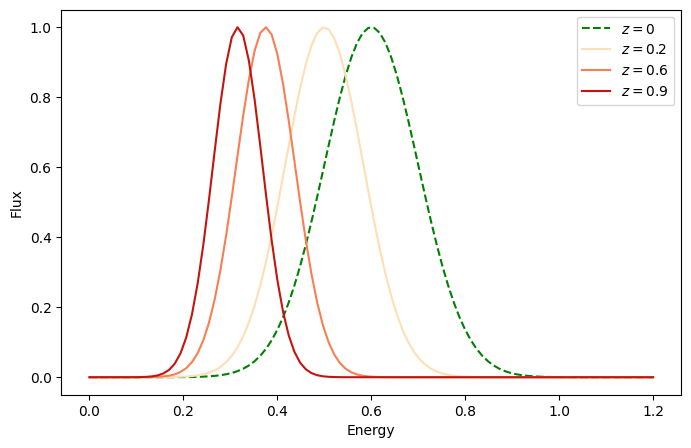

In [22]:
from model import Model
import matplotlib.pyplot as plt

def gaussian_1d(x, x0, sigma):
    return np.exp(-((x - x0) ** 2) / (2 * sigma**2))

def scale_factor(x, redshift):
    return x*(1 + redshift)

energy = Model.wrap(gaussian_1d, grid_variables=['x'],
                    name = 'energy distribution')

redshift = Model.wrap(scale_factor, grid_variables=['x'],
                      name = 'redshift factor')

redshifted_energy = redshift |  energy 

redshifted_energy['redshift_0'].description = 'z'
print(redshifted_energy)

x = np.linspace(0, 1.2, 100)

plt.figure(figsize=(8, 5))
plt.plot(x, redshifted_energy(x, redshift_0 = 0, x0_1=0.6, sigma_1 =.1), "g--", label="$z=0$")

for z in (0.2, 0.6, .9):
    #g = RedshiftScaleFactor(z) | Gaussian1D(1, 0.75, 0.1)
    plt.plot(
        x, redshifted_energy(x, redshift_0=z, x0_1=0.6,sigma_1 =.1), color=plt.cm.OrRd(z/1.1), label=f"$z={z}$"
    )

plt.xlabel("Energy")
plt.ylabel("Flux")
plt.legend()


COMPOSITE MODEL NAME: CompositeModel
CONTAINED MODELS: redshift factor, energy distribution, inverse redshift factor
GRID VARIABLES: ['x']
LOGIC: ((redshift factor [0] | energy distribution [1]) | inverse redshift factor [2])
FREE PARAMS: 4
------------------------------------------------------------
  INDEX  NAME          VALUE  IS-FREE    PRIOR               DESCR
      0  redshift_0        1  Yes        Uniform(-inf, inf)  z
      1  x0_1              1  Yes        Uniform(-inf, inf)
      2  sigma_1           1  Yes        Uniform(-inf, inf)
      3  redshift_2        1  Yes        Uniform(-inf, inf)  inverse z


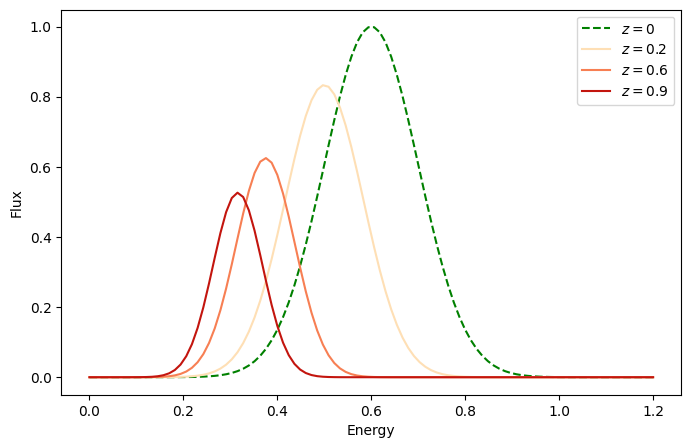

In [23]:
from model import Model
import matplotlib.pyplot as plt

def inverse_scale_factor(x, redshift):
    return x/(1+redshift)



inverse_redshift = Model.wrap(inverse_scale_factor, 
                              grid_variables=['x'],
                              name = 'inverse redshift factor')

redshifted_energy = redshift | energy | inverse_redshift 

redshifted_energy['redshift_2'].description = r'inverse z'
print(redshifted_energy)

x = np.linspace(0, 1.2, 100)

plt.figure(figsize=(8, 5))
plt.plot(
    x, redshifted_energy(x, redshift_0=0, x0_1=0.6, sigma_1=0.1, redshift_2=0), "g--", label="$z=0$"
)

for z in (0.2, 0.6, .9):
    # g = RedshiftScaleFactor(z) | Gaussian1D(1, 0.75, 0.1)
    plt.plot(
        x,
        redshifted_energy(x, redshift_0=z, x0_1=0.6, sigma_1=0.1, redshift_2=z),
        color=plt.cm.OrRd(z / 1.1),
        label=f"$z={z}$",
    )

plt.xlabel("Energy")
plt.ylabel("Flux")
plt.legend()


In [24]:
from model import Model
from parameter import TieConstrain

def check1(a, b):
    return f'a = {a}, b = {b}'

def check2(c,d):
    return f'c={c}, d={d}'

mod = Model.wrap(check1) + Model.wrap(check2)

#mod['c_1'].constrain = TieConstrain(lambda x: x, 'b_0')    


print(mod.call([],11,33,22,1))

a = 11, b = 33c=22, d=1
